In [16]:
import pandas as pd
from sklearn import * 
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [35]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy()

del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


param_grid = {
    "est__l1_ratio": np.linspace(0, 0.05, 10),
    "est__alpha": 10 ** np.linspace(0, 2, 10)
}

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=1.0)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

(<matplotlib.figure.Figure at 0x1130f69e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1132757f0>)

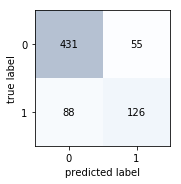

In [36]:
plot_confusion_matrix(metrics.confusion_matrix(y_train, y_train_pred))

In [37]:
(431+126)/len(X_train)

0.7957142857142857

In [38]:
pipe.score(X_train, y_train)

0.7957142857142857

In [39]:
pipe.score(X_test, y_test)

0.7566666666666667

(<matplotlib.figure.Figure at 0x113299978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1132a2048>)

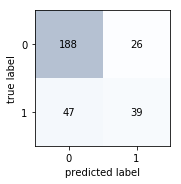

In [40]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [41]:
metrics.recall_score(y_test, y_test_pred)

0.45348837209302323

In [42]:
metrics.precision_score(y_test, y_test_pred)

0.6

In [43]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

recall: 0.6395348837209303 precision 0.4954954954954955


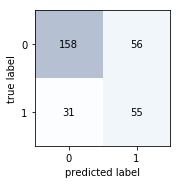

In [47]:
y_test_pred = np.where(y_test_prob > 0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("recall:", metrics.recall_score(y_test, y_test_pred),
"precision", metrics.precision_score(y_test, y_test_pred))